# Assignment 2
Letter Recognition using Deep Learning

In [1]:
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('letter-recognition.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.fillna(-99999, axis=1, inplace=True)

## With dimensionality reduction

In [8]:
features = df.drop(columns=['letter'], axis=1)

In [10]:
scaler = StandardScaler()
features_scaled = scaler.fit(features)
features_scaled = scaler.transform(features)

In [12]:
pca = PCA(n_components=2)
features_pca = pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)
print(features.shape)
print(features_pca.shape)

(20000, 16)
(20000, 2)


In [14]:
labels = np.array([ord(letter)-52-13 for letter in np.array(df['letter'])])
labels

array([19,  8,  3, ..., 19, 18,  0])

In [16]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [18]:
df = pd.DataFrame(features_pca, columns=["1st component", "2nd component"])
df["letter"] = labels.astype(float)
df

,1st component,2nd component,letter
0,-2.080335,1.721470,19.0
1,0.369373,-2.014125,8.0
2,1.654349,-1.754985,3.0
3,1.490281,0.508883,13.0
4,-3.080981,-2.069841,6.0
...,...,...,...
19995,-2.380036,-0.131239,3.0
19996,1.957901,1.326366,2.0
19997,1.285032,3.849970,19.0
19998,-2.345298,-0.183456,18.0


<Axes: xlabel='1st component', ylabel='2nd component'>

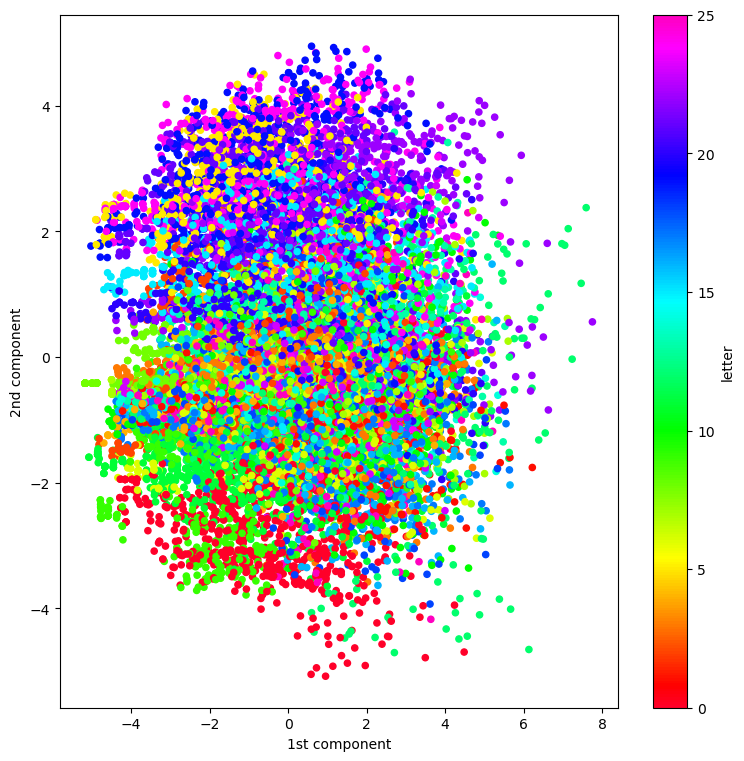

In [20]:
df.plot.scatter(x='1st component', y='2nd component', c='letter', cmap='gist_rainbow', figsize=(9,9), sharex=False)

In [22]:
tsne = TSNE(n_components=2, random_state=0)
features_embedded = tsne.fit_transform(features_scaled)
features_embedded

array([[-77.36411 ,  64.14669 ],
       [ 66.72046 ,  18.648197],
       [ 18.212538,   9.263599],
       ...,
       [ 23.255762,  72.0964  ],
       [-16.046932,  14.537569],
       [ 55.6895  , -66.730125]], dtype=float32)

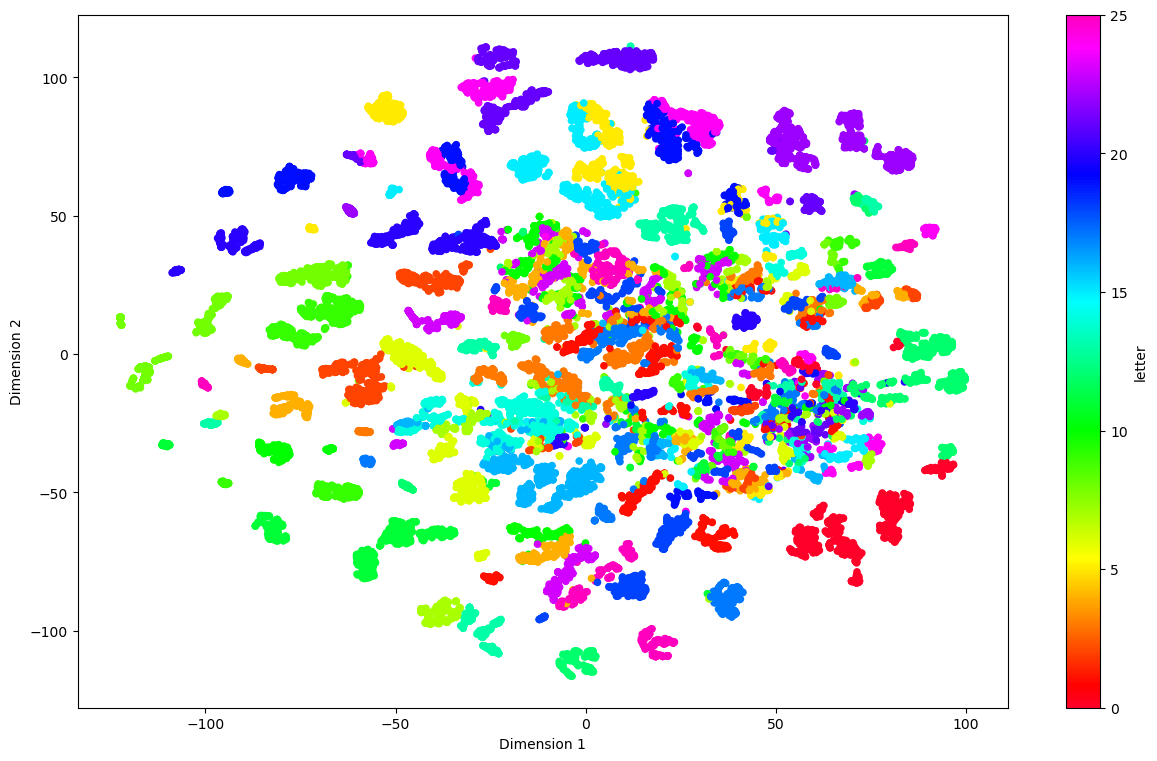

In [23]:
df2 = pd.DataFrame(features_embedded, columns=["Dimension 1", "Dimension 2"])
df2["letter"] = labels
df2.plot.scatter(x='Dimension 1', y='Dimension 2', c='letter', cmap='gist_rainbow', figsize=(15,9), sharex=False);

In [26]:
df2.head()

,Dimension 1,Dimension 2,letter
0,-77.364113,64.146690,19
1,66.720459,18.648197,8
2,18.212538,9.263599,3
3,74.981178,52.684483,13
4,-26.394232,-72.025307,6


In [28]:
X = np.array(df2.drop(['letter'], axis=1))
y = np.array(df2['letter'])
X.shape, y.shape

((20000, 2), (20000,))

In [30]:
y = np.eye(26)[y]

In [32]:
X.shape, y.shape

((20000, 2), (20000, 26))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping])

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2248 - loss: 2.8025 - val_accuracy: 0.2743 - val_loss: 2.1823
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3102 - loss: 2.0896 - val_accuracy: 0.3175 - val_loss: 1.9777
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3544 - loss: 1.9035 - val_accuracy: 0.4335 - val_loss: 1.7792
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4285 - loss: 1.6926 - val_accuracy: 0.4832 - val_loss: 1.5352
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4933 - loss: 1.5029 - val_accuracy: 0.5412 - val_loss: 1.3893
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5370 - loss: 1.3664 - val_accuracy: 0.5753 - val_loss: 1.2760
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5867 - loss: 1.2292 - val_accuracy: 0.6235 - val_loss: 1.1707
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6139 - loss: 1.1473 - val_accu

In [44]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
y_pred

array([[1.6441747e-23, 4.1012198e-18, 2.1887439e-07, ..., 2.7780104e-07,
        1.4702334e-01, 5.5354103e-06],
       [4.9060620e-24, 3.6283967e-30, 4.9964307e-11, ..., 3.8270187e-07,
        1.7984541e-17, 6.5540647e-05],
       [2.5328200e-33, 0.0000000e+00, 1.9439207e-12, ..., 5.1634152e-18,
        6.6867054e-01, 2.2075801e-19],
       ...,
       [9.9833798e-01, 1.0295793e-05, 2.6348402e-05, ..., 3.0948988e-07,
        1.2924941e-05, 2.4345753e-11],
       [1.0172967e-23, 1.0192172e-35, 7.4909659e-13, ..., 4.9371436e-14,
        5.5737823e-04, 4.8743131e-14],
       [1.0109529e-27, 0.0000000e+00, 9.0138888e-13, ..., 4.5647854e-09,
        9.7164759e-16, 7.1631004e-20]], dtype=float32)

In [51]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       161
           1       0.68      0.75      0.71       160
           2       0.75      0.89      0.81       141
           3       0.80      0.88      0.84       143
           4       0.68      0.65      0.66       168
           5       0.73      0.72      0.72       146
           6       0.91      0.78      0.84       162
           7       0.62      0.49      0.55       136
           8       0.85      0.89      0.87       150
           9       0.79      0.85      0.82       143
          10       0.79      0.59      0.68       161
          11       0.83      0.94      0.88       178
          12       0.87      0.93      0.90       142
          13       0.87      0.88      0.88       173
          14       0.70      0.89      0.79       150
          15       0.83      0.84      0.83       165
          16       0.82      0.80      0.81       176
          17       0.82    

## Without Dimensionality Reduction

In [56]:
df = pd.read_csv('letter-recognition.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [58]:
X = df.drop(['letter'], axis=1)
y = df['letter']

In [60]:
y = np.array([ord(letter)-52-13 for letter in y])
y

array([19,  8,  3, ..., 19, 18,  0])

In [62]:
X.shape, y.shape

((20000, 16), (20000,))

In [64]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [66]:
y = np.eye(26)[y]

In [68]:
X.shape, y.shape

((20000, 16), (20000, 26))

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

In [78]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=3, restore_best_weights=True)

In [80]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping])

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3085 - loss: 2.5983 - val_accuracy: 0.6928 - val_loss: 1.2136
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7138 - loss: 1.0700 - val_accuracy: 0.7619 - val_loss: 0.8632
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7794 - loss: 0.7965 - val_accuracy: 0.7922 - val_loss: 0.7190
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8204 - loss: 0.6493 - val_accuracy: 0.8194 - val_loss: 0.6222
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8339 - loss: 0.5604 - val_accuracy: 0.8394 - val_loss: 0.5504
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8476 - loss: 0.5079 - val_accuracy: 0.8559 - val_loss: 0.4976
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.4574 - val_accuracy: 0.8637 - val_loss: 0.4568
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8800 - loss: 0.4115 - val_accuracy: 0.

In [81]:
model.evaluate(X_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9318 - loss: 0.2006


[0.19992150366306305, 0.9337499737739563]

In [84]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [86]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       162
           1       0.95      0.86      0.90       151
           2       0.98      0.91      0.95       164
           3       0.89      0.92      0.90       166
           4       0.90      0.91      0.91       151
           5       0.94      0.91      0.93       163
           6       0.92      0.85      0.89       149
           7       0.85      0.85      0.85       145
           8       0.93      0.95      0.94       148
           9       0.95      0.95      0.95       144
          10       0.88      0.94      0.91       170
          11       0.96      0.91      0.93       144
          12       0.96      0.99      0.98       147
          13       0.96      0.95      0.96       162
          14       0.89      0.91      0.90       129
          15       0.94      0.95      0.95       151
          16       0.96      0.92      0.94       151
          17       0.83    